In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import math

In [116]:
# Dataset : https://www.kaggle.com/datasets/gescobero/ethereum-fraud-dataset
df = pd.read_csv('/kaggle/input/ethereum-fraud-dataset/eth_illicit_features.csv', index_col=0)
print("Row : ", df.shape[0])
print("Columns : ", df.shape[1])
df.head()

Row :  12146
Columns :  33


,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,21,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,2,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,22,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,111,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,4,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [117]:
import pandas as pd

# Assuming 'data' is the DataFrame with your initial columns
data = pd.read_csv('/kaggle/input/ethereum-fraudulent-users/blacklist_ether.csv')

# Renaming columns
data = data.rename(columns={
    'timeDiffFirstLastMins': 'lifetime',
    'avgValReceived': 'avgValReceived',
    'avgMinBetweenReceivedTnx': 'avgTimeBetweenRecTnx',
    'totalEtherSent': 'totalEtherSent',
    'totalEtherReceived': 'totalEtherReceived',
    'receivedTnx': 'receivedTransactions',
    'sentTnx': 'sentTransactions',
    'avgMinBetweenSentTnx': 'avgTimeBetweenSentTnx',
    'totalEtherBalance': 'totalEtherBalance',
    'avgValSent': 'avgValSent'
})

# Deriving additional columns
data['totalTransactions'] = data['sentTransactions'] + data['receivedTransactions']
data['ratioRecSent'] = data['receivedTransactions'] / data['sentTransactions'].replace(0, 1)  # Avoid division by zero
data['ratioSentTotal'] = data['sentTransactions'] / data['totalTransactions'].replace(0, 1)  # Avoid division by zero
data['ratioRecTotal'] = data['receivedTransactions'] / data['totalTransactions'].replace(0, 1)  # Avoid division by zero

# Dropping columns that don't match the target schema
required_columns = [
    'flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx', 'avgTimeBetweenSentTnx',
    'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx', 'avgTimeBetweenRecTnx', 'lifetime',
    'sentTransactions', 'receivedTransactions', 'createdContracts', 'numUniqSentAddress',
    'numUniqRecAddress', 'minValSent', 'maxValSent', 'avgValSent', 'minValReceived',
    'maxValReceived', 'avgValReceived', 'totalTransactions', 'totalEtherSent',
    'totalEtherReceived', 'totalEtherSentContracts', 'totalEtherBalance', 'activityDays',
    'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal', 'giniSent', 'giniRec',
    'txFreq', 'stdBalanceEth'
]

# Drop columns not in the required columns
data = data[[col for col in required_columns if col in data.columns]]
data.head()

data['flag']=1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avgTimeBetweenSentTnx  5131 non-null   float64
 1   avgTimeBetweenRecTnx   5131 non-null   float64
 2   lifetime               5131 non-null   float64
 3   sentTransactions       5131 non-null   int64  
 4   receivedTransactions   5131 non-null   int64  
 5   avgValSent             5131 non-null   float64
 6   avgValReceived         5131 non-null   float64
 7   totalTransactions      5131 non-null   int64  
 8   totalEtherSent         5131 non-null   float64
 9   totalEtherReceived     5131 non-null   float64
 10  totalEtherBalance      5131 non-null   float64
 11  ratioRecSent           5131 non-null   float64
 12  ratioSentTotal         5131 non-null   float64
 13  ratioRecTotal          5131 non-null   float64
 14  flag                   5131 non-null   int64  
dtypes: f

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

In [119]:
# Assuming 'data' is the reference DataFrame and 'df' is the DataFrame to be modified
# Get the list of columns in the reference DataFrame and add 'flag'
reference_columns = list(data.columns) 
# Drop columns in 'df' that are not in 'reference_columns'
df = df[df.columns.intersection(reference_columns)]

In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flag                   12146 non-null  int64  
 1   avgTimeBetweenSentTnx  12146 non-null  float64
 2   avgTimeBetweenRecTnx   12146 non-null  float64
 3   lifetime               12146 non-null  int64  
 4   sentTransactions       12146 non-null  int64  
 5   receivedTransactions   12146 non-null  int64  
 6   avgValSent             12146 non-null  float64
 7   avgValReceived         12146 non-null  float64
 8   totalTransactions      12146 non-null  int64  
 9   totalEtherSent         12146 non-null  float64
 10  totalEtherReceived     12146 non-null  float64
 11  totalEtherBalance      12146 non-null  float64
 12  ratioRecSent           12146 non-null  float64
 13  ratioSentTotal         12146 non-

In [121]:
# Concatenate df and data along rows (default behavior)
df = pd.concat([df, data], ignore_index=True).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17277 entries, 0 to 17276
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  17277 non-null  int64  
 1   flag                   17277 non-null  int64  
 2   avgTimeBetweenSentTnx  17277 non-null  float64
 3   avgTimeBetweenRecTnx   17277 non-null  float64
 4   lifetime               17277 non-null  float64
 5   sentTransactions       17277 non-null  int64  
 6   receivedTransactions   17277 non-null  int64  
 7   avgValSent             17277 non-null  float64
 8   avgValReceived         17277 non-null  float64
 9   totalTransactions      17277 non-null  int64  
 10  totalEtherSent         17277 non-null  float64
 11  totalEtherReceived     17277 non-null  float64
 12  totalEtherBalance      17277 non-null  float64
 13  ratioRecSent           17277 non-null  float64
 14  ratioSentTotal         17277 non-null  float64
 15  ra

In [122]:
# Inspect target distribution
print(df['flag'].value_counts())


flag
1    10281
0     6996
Name: count, dtype: int64


In [123]:
df.drop(columns=['index'],inplace=True)

In [124]:
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

Series([], dtype: float64)


flag                     2.409759e-01
avgTimeBetweenSentTnx    1.196798e+15
avgTimeBetweenRecTnx     4.350096e+16
lifetime                 1.191206e+11
sentTransactions         2.560658e+06
receivedTransactions     4.025090e+06
avgValSent               6.296730e+04
avgValReceived           5.005933e+06
totalTransactions        6.708011e+06
totalEtherSent           6.037973e+09
totalEtherReceived       2.443539e+09
totalEtherBalance        3.045818e+09
ratioRecSent             3.849227e+06
ratioSentTotal           1.091606e-01
ratioRecTotal            1.094981e-01
dtype: float64
(17277, 15)


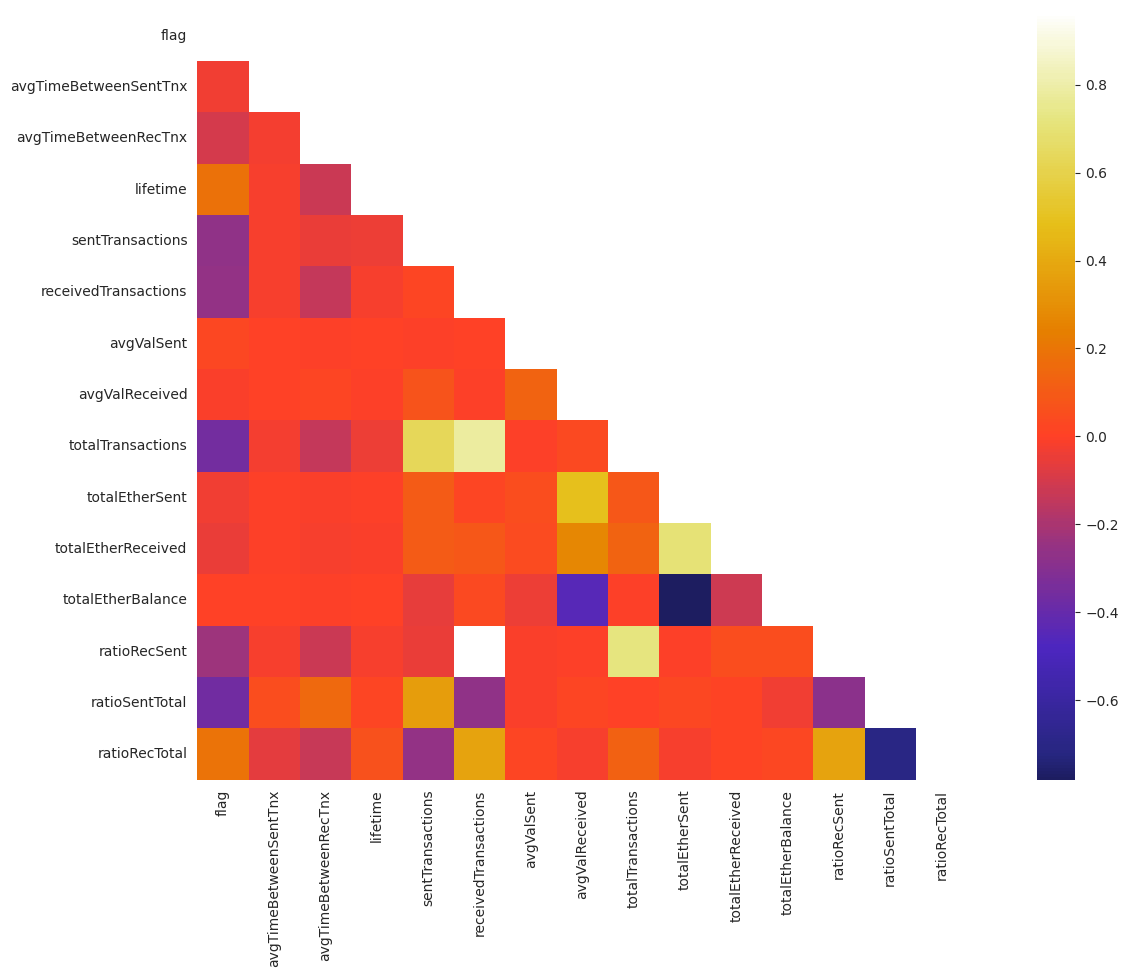

In [125]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

In [126]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)
print(y.value_counts())

(17277, 14) (17277,)
flag
1    10281
0     6996
Name: count, dtype: int64


In [127]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13821, 14) (13821,)
(3456, 14) (3456,)


In [128]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [129]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,avgValSent,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherBalance,ratioRecSent,ratioSentTotal,ratioRecTotal
0,0.742503,0.147839,0.551112,1.730040,1.797928,1.844333,2.063814,1.639666,2.110013,2.161257,0.008760,0.068761,0.238740,0.355358
1,-0.146034,-1.358497,-1.387473,-0.405058,-1.104854,-0.909572,-1.039192,-0.938144,-1.116705,-1.213442,-0.007086,-0.664424,0.377298,-0.580368
2,0.598840,-0.453713,1.473800,0.044638,-0.084580,1.152874,1.222639,-0.280278,0.733522,0.691473,-0.007086,0.167696,0.134754,0.456173
3,-1.145263,1.033566,-1.387473,-0.710821,-0.012750,1.701239,1.061602,-0.416511,0.696456,0.652533,-0.007086,0.867910,-0.944307,1.027595
4,0.719471,0.975686,-0.108589,0.797030,0.198686,0.564063,1.402087,0.255103,1.045362,1.018174,-0.007085,-0.567660,0.864196,-0.434443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,-1.145263,-1.358497,-1.684452,-1.319610,-1.759762,-0.917939,-1.076284,-1.882339,-1.122640,-1.223603,-0.007086,-1.192301,-1.353155,-1.539348
13817,1.073249,1.304327,0.144006,-0.207936,-0.770018,-0.764711,-0.770972,-0.698170,-0.967074,-1.059324,-0.007086,-0.473315,0.377298,-0.299498
13818,0.083398,0.835115,-0.893492,1.148516,0.566646,0.482658,0.931911,0.644886,1.340216,1.057028,-0.008212,-0.694873,1.040084,-0.627948
13819,-0.176123,-0.759389,1.252865,1.191438,0.397903,-0.603562,-0.544070,0.664221,0.684662,-0.048167,-0.007086,-0.868986,1.248447,-0.916533


In [141]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((13821, 14), (13821,))
Shape of the training after SMOTE: ((16408, 14), (16408,))


In [142]:

non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')


BEFORE OVERSAMPLING 
 	Non-frauds: 5617 
 	Fauds: 8204
AFTER OVERSAMPLING 
 	Non-frauds: 8204 
 	Frauds: 8205


In [143]:
LR = LogisticRegression(random_state=0)
LR.fit(norm_train_f, y_train)
# Transform test features
norm_test_f = norm.transform(X_test)
preds = LR.predict(norm_test_f)

In [144]:
print(y_test.shape)
y_test.value_counts()

(3456,)


flag
1    2077
0    1379
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1379
           1       0.86      0.86      0.86      2077

    accuracy                           0.83      3456
   macro avg       0.82      0.82      0.82      3456
weighted avg       0.83      0.83      0.83      3456

[[1082  297]
 [ 287 1790]]


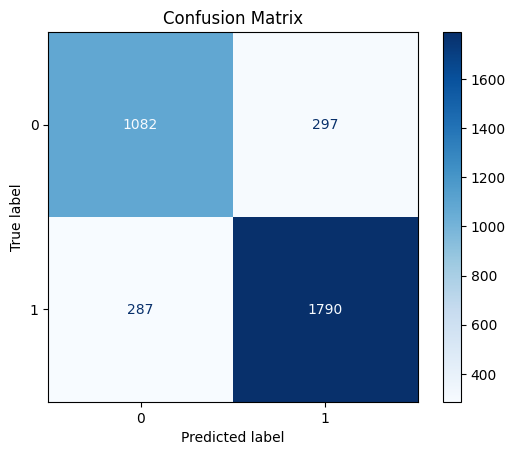

In [145]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1379
           1       0.95      0.88      0.91      2077

    accuracy                           0.90      3456
   macro avg       0.89      0.90      0.90      3456
weighted avg       0.90      0.90      0.90      3456

[[1280   99]
 [ 249 1828]]


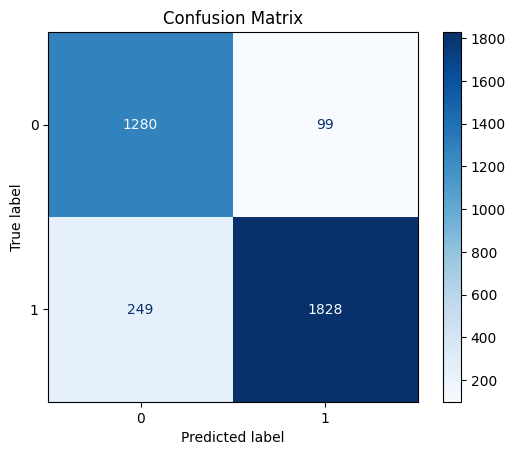

In [147]:
RF = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)

RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(X_test)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))
cm = confusion_matrix(y_test, preds_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1379
           1       0.95      0.93      0.94      2077

    accuracy                           0.93      3456
   macro avg       0.92      0.93      0.93      3456
weighted avg       0.93      0.93      0.93      3456

[[1278  101]
 [ 146 1931]]


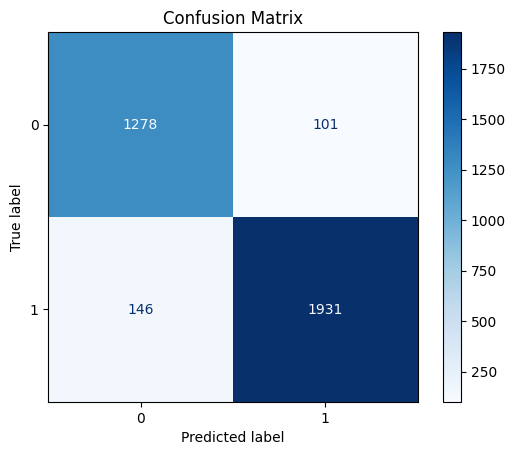

In [148]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(X_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
cm = confusion_matrix(y_test, preds_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

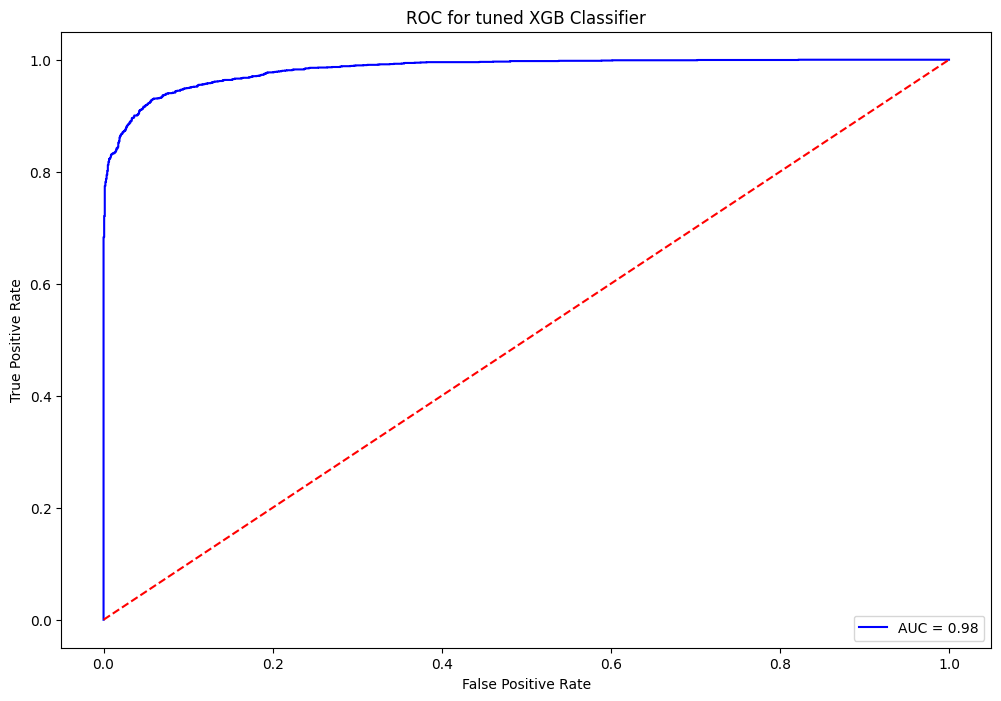

In [137]:

probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

catboost_model = CatBoostClassifier(random_seed=42, verbose=0)  
catboost_model.fit(x_tr_resample, y_tr_resample)

start_time = time.time()
preds_catboost = catboost_model.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time

average_time_per_prediction = inference_time / len(norm_test_f)

print(classification_report(y_test, preds_catboost))
print(confusion_matrix(y_test, preds_catboost))

print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Average time per prediction: {average_time_per_prediction:.6f} seconds")



              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1379
           1       0.96      0.92      0.94      2077

    accuracy                           0.93      3456
   macro avg       0.92      0.93      0.93      3456
weighted avg       0.93      0.93      0.93      3456

[[1292   87]
 [ 160 1917]]
Total inference time: 0.0065 seconds
Average time per prediction: 0.000002 seconds


In [150]:
# Sort feature importance by descending order
importances = RF.feature_importances_

# Create a list of (feature, importance) pairs
feature_importance_pairs = list(zip(X_train.columns, importances))
feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Display feature importance
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")


lifetime: 0.1690
totalTransactions: 0.1295
avgValSent: 0.1202
totalEtherBalance: 0.0996
ratioRecSent: 0.0696
sentTransactions: 0.0677
avgTimeBetweenRecTnx: 0.0669
ratioSentTotal: 0.0548
ratioRecTotal: 0.0538
avgValReceived: 0.0404
avgTimeBetweenSentTnx: 0.0379
receivedTransactions: 0.0366
totalEtherReceived: 0.0318
totalEtherSent: 0.0221


In [153]:
import pickle
pickle_out = open('xgb_2_model.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()